# DirecTV Next-Gen Recommendations: Data Understanding

Full TMDb TV Shows Data

Jonathan Vergonio

## Descriptive Statistics

In [51]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("TMDB_tv_dataset_v3.csv")

In [53]:
df.describe(include='all')

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
count,168639.000000,168634,168639.000000,168639.000000,168639,168639.000000,168639.000000,93333,168639,77780,...,5330,99713,36496,110050,97589,137609,109280,59342,77511,168639.000000
unique,NaN,155586,NaN,NaN,106,NaN,NaN,91243,2,76300,...,5267,2228,26081,1113,8196,792,946,27132,1247,NaN
top,NaN,二十四孝动画全集,NaN,NaN,en,NaN,NaN,Thai Drama 2019.,False,/rYLnnA0GBXATn8kMXCNY0r8mA8Q.jpg,...,drama,Documentary,Shotaro Ishinomori,en,BBC One,US,English,TVB,Japan,NaN
freq,NaN,24,NaN,NaN,76304,NaN,NaN,27,166600,12,...,4,17596,107,38671,2103,28759,39251,1356,9682,NaN
mean,111307.074704,NaN,1.548497,24.465082,NaN,13.305054,2.333843,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.603348
std,76451.662352,NaN,2.942872,134.799622,NaN,190.809059,3.454334,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.950427
min,1.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,45936.500000,NaN,1.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,97734.000000,NaN,1.000000,6.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,196923.500000,NaN,1.000000,20.000000,NaN,1.000000,6.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000000


In [54]:
df.shape

(168639, 29)

29 Rows, ~160,000 TV Shows present in the data

In [55]:
df.columns.tolist()

['id',
 'name',
 'number_of_seasons',
 'number_of_episodes',
 'original_language',
 'vote_count',
 'vote_average',
 'overview',
 'adult',
 'backdrop_path',
 'first_air_date',
 'last_air_date',
 'homepage',
 'in_production',
 'original_name',
 'popularity',
 'poster_path',
 'type',
 'status',
 'tagline',
 'genres',
 'created_by',
 'languages',
 'networks',
 'origin_country',
 'spoken_languages',
 'production_companies',
 'production_countries',
 'episode_run_time']

In [56]:
df.isnull().sum()

,0
id,0
name,5
number_of_seasons,0
number_of_episodes,0
original_language,0
vote_count,0
vote_average,0
overview,75306
adult,0
backdrop_path,90859


Look into dropping high null columns, such as tagline

## Histograms -- Note for Data Cleaning

In [57]:
numerical_columns = ['number_of_seasons', 'number_of_episodes', 'vote_count', 'vote_average', 'popularity', 'episode_run_time']

The histograms indicate that most of the numerical columns in your dataset have highly skewed distributions.

A small number of extreme values dominate the range indicating that outliers are present.

We must deal with this to improve our models, so we should do log transformation and look at the outliers to see if we should discard them.

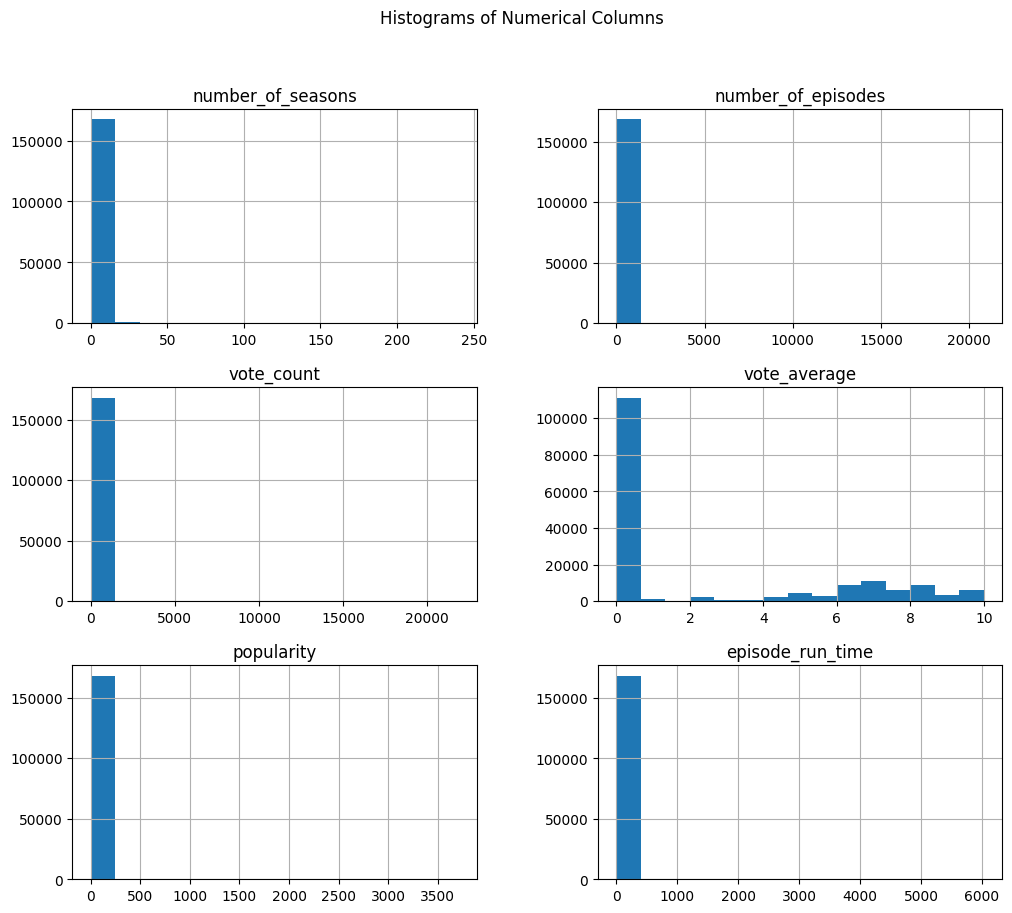

In [58]:
df[numerical_columns].hist(figsize=(12, 10), bins=15)
plt.suptitle('Histograms of Numerical Columns')
plt.show()

### How much data is under 0.001 or near 0

In [59]:
threshold = 0.001

near_zero_counts = {}

for col in numerical_columns:
    count_near_zero = df[df[col] <= threshold].shape[0]
    percentage_near_zero = (count_near_zero / df.shape[0]) * 100
    near_zero_counts[col] = {'count': count_near_zero, 'percentage': percentage_near_zero}

near_zero_df = pd.DataFrame.from_dict(near_zero_counts, orient='index')
near_zero_df.columns = ['Count Near Zero', 'Percentage Near Zero']


print(near_zero_df)

                    Count Near Zero  Percentage Near Zero
number_of_seasons             22428             13.299415
number_of_episodes            24016             14.241071
vote_count                   111137             65.902312
vote_average                 111135             65.901126
popularity                     2385              1.414264
episode_run_time              85315             50.590314


13 percent of the TV shows had less than 0.001 seasons? 14 percent had less than 0.001 episodes? We have to look into this messy data.

In [60]:
threshold = 1

near_zero_counts = {}

for col in numerical_columns:
    count_near_zero = df[df[col] <= threshold].shape[0]
    percentage_near_zero = (count_near_zero / df.shape[0]) * 100
    near_zero_counts[col] = {'count': count_near_zero, 'percentage': percentage_near_zero}

near_zero_df = pd.DataFrame.from_dict(near_zero_counts, orient='index')
near_zero_df.columns = ['Count Near Zero', 'Percentage Near Zero']

print(near_zero_df)

                    Count Near Zero  Percentage Near Zero
number_of_seasons            136454             80.914854
number_of_episodes            51902             30.776985
vote_count                   133648             79.250944
vote_average                 112162             66.510119
popularity                    91127             54.036729
episode_run_time              85454             50.672739


Did this for fun, A lot of popularity scores are under 1.

## Further dive in Popularity

In [61]:
df['popularity'].describe()

,popularity
count,168639.000000
mean,5.882644
std,42.023216
min,0.000000
25%,0.600000
50%,0.857000
75%,2.431500
max,3707.008000


The mean popularity score is 5, indicating there are many TV shows that are not that popular.

In [62]:
top_100_popular_shows = df.sort_values(by='popularity', ascending=False).head(40)
print(top_100_popular_shows[['name', 'popularity', 'overview']])

                                           name  popularity  \
1771         The Late Show with Stephen Colbert    3707.008   
3035                              Batang Quiapo    3065.138   
2285                                 Tagesschau    3049.228   
3593     The Late Late Show with Craig Ferguson    2898.984   
4565    The Tonight Show Starring Johnny Carson    2747.685   
4651                      Chronicles of the Sun    2593.643   
1600     The Tonight Show Starring Jimmy Fallon    2419.997   
7314                    El amor no tiene receta    2287.324   
8641                      Pira-Pirasong Paraiso    2278.406   
7217              Come Home Love: Lo and Behold    2232.167   
4329                            Revenge is mine    2207.068   
42507                               The Porters    2197.590   
94057                         After You Left Me    2148.789   
142924                                 Alliance    2071.972   
29134                    Ramez Gab Min El Akher    2060

The most popular show was The Late Show with Stephen Colbert, which was interesting. A lot of "Late Shows" type of shows are ranked highly in the dataset.

## Correlation Heatmap

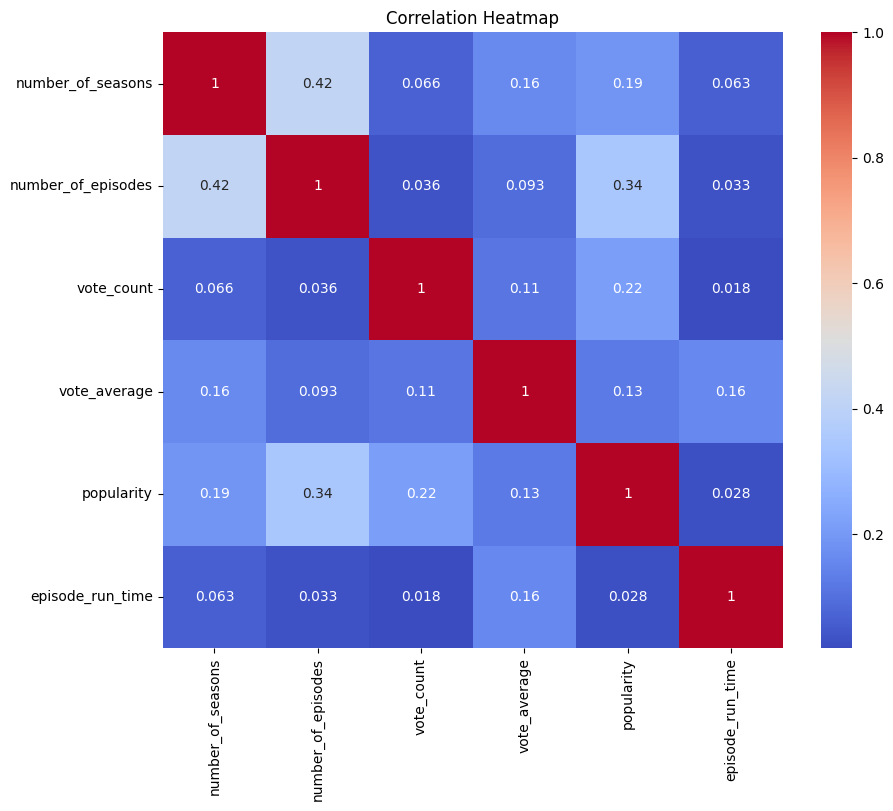

In [63]:
plt.figure(figsize=(10, 8))
corr = df[numerical_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

There are subtle popsitive correlations with Popularity and number of episodes, number of seasons, vote count, and vote average, which makes sense for future analysis.

## Wordcloud for Top 50 TV Shows in Dataset that have an overview and also All TV Shows

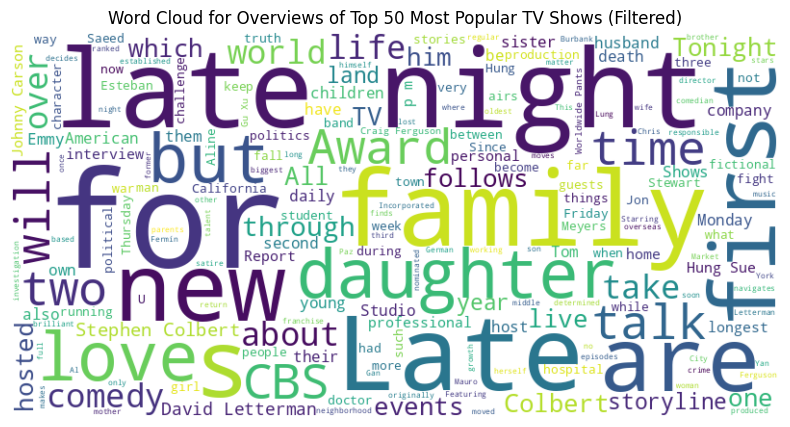

In [66]:
from wordcloud import WordCloud

top_50_df = df.sort_values(by='popularity', ascending=False).head(50)
top_50_df_cleaned = top_50_df[top_50_df['overview'].notna()]

# Combine all text in the 'overview' column into a single string
text = ' '.join(top_50_df_cleaned['overview'].astype(str))

STOPWORDS = []
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    'show', 'series', 'television', 'episode', 'television series',
    'and', 'is', 'a', 'of', 'the', 'to', 'from', 'as', 'in', 'with', 'it', 'was', 'her', 'she', 'his', 'has', 'by', 'on', 'at', 'he', 'that',
    'an', 'who', 'its', 'after', 'program'
])

# Generate the word cloud for the top 50 shows
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=200, stopwords=custom_stopwords).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for better visualization
plt.title('Word Cloud for Overviews of Top 50 Most Popular TV Shows (Filtered)')
plt.show()

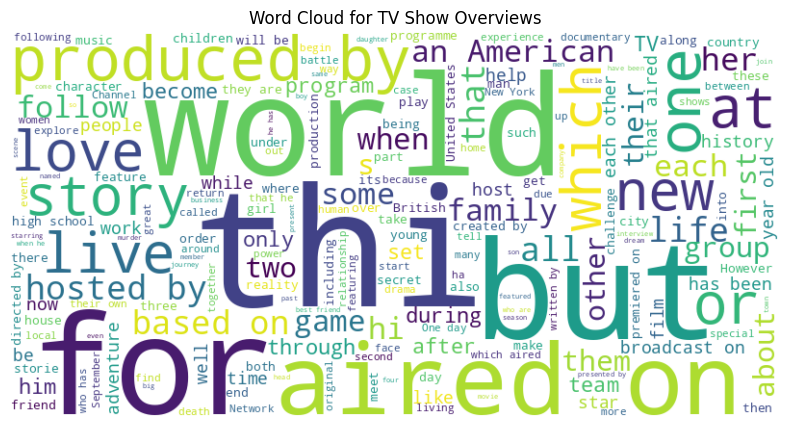

In [65]:
# remove rows with null values in the 'overview' column
df_cleaned = df[df['overview'].notna()]

# combine all text in the 'overview' column into a single string
text = ' '.join(df_cleaned['overview'].astype(str))

#stopwords for better analysis
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    'show', 'series', 'television', 'episode', 'television series',
    'and', 'is', 'a', 'of', 'the', 'to', 'from', 'as', 'in', 'with', 'it', 'was'
])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=200, stopwords=custom_stopwords).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for TV Show Overviews')
plt.show()


# Questions/Extra Notes From Meeting (Miscellaneous):

- How is Popularity generally calculated? In the dataset, it stated that the column "popularity" is Popularity score of the TV show. If 0, no popularity data was available (type: float)


- How is missing data handled at the industry level, how do we know when to drop a column or choose to impute values?


- Couple things we should be careful with: Constant correlation, number of episodes (obviously, not popular enough gonna cut seriously)

- Pearson Correlation Coefficient = 0.34
- 0.2,not say not correlated, still a positive correlation


- Some type of human decision -> Dropping those columns (ID, etc.), 40 columns instead of 10, make decisions faster, drop ID, path, home page

Language, cardinality (99% of the shows English), Reduce dimensions


- Missing more than 80% -> Garbage


- How many shows have a high rating

- LLM -> Overview Column, (Theme in a show)
- Falls in love with a girl, create another column from overview, Themes, etc.

- Better with or without LLM Output  (See output with it)

-Theme (put prompts), themes per show

-6-7 Teams OpenAI API Key

-LLM (import)
-Anything without a price tag should be used, there should be a free version

- Open Sourced Model -- (HuggingFace = explore the models there)